%%HTML

<style type="text/css">

div.h2 {
    background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}



# This is the actual HTML code you would put in a markdown cell. I can't do it here because
# it cuts the rest of the notebook off for some reason.



In [32]:
%%HTML
<div class="h2">Table of contents</div>
<a href='#about'>About Covid-19</a></br>
<a href='#prep'>Data Preperation</a></br>
<a href='#dav'>Data Analysis & Visualization</a></br>
<a href='#que'>Questions</a></br>
<a href='#con'>Conclusion</a></br>
<a href='#ref'>References</a></br>

In [20]:
%%HTML
<div id="about" class="h2">1.About COVID-19</div>
<p align="justify">COVID-19 otherwise known as corona virus 2019 is an infectious disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2).It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic.</p>
<p>Symptoms of COVID-19 are variable, but usually include fever and a cough. People with the same infection may have different symptoms, and their symptoms may change over time. For example, one person may have a high fever, a cough, and fatigue, and another person may have a low fever at the start of the disease and develop difficulty breathing a week later. All of the symptoms of COVID-19 are non-specific, which means that they are also seen in some other diseases.</p>
<a href="https://en.wikipedia.org/wiki/Coronavirus_disease_2019">Wikipedia Page</a>

In [24]:
%%HTML
<div id="prep" class="h2">2.Data Preperation</div>


%%HTML
<h2>  2.1 Import necessary libraries</h2>

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
!pip install chart_studio -q
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import re                                  # library for regular expression operations
import string                              # for string operations
#datetime
from datetime import datetime
#some libraries may not be used here


%%HTML
<h2>2.2 Load the dataset</h2>
<p>Loading the covid 19 dataset into pandas dataframe covid_df</p>

In [4]:
url= 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv'
covid_df_description = pd.read_csv(url,',') # loading the description dataset for the main data set columns of covid-19 data

In [5]:
covid_df_description #contains the column description of covid_df data frame

,column,description,source
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes,International Organization for Standardization
1,continent,Continent of the geographical location,Our World in Data
2,location,Geographical location,Our World in Data
3,date,Date of observation,Our World in Data
4,total_cases,Total confirmed cases of COVID-19,European Centre for Disease Prevention and Con...
5,new_cases,New confirmed cases of COVID-19,European Centre for Disease Prevention and Con...
6,new_cases_smoothed,New confirmed cases of COVID-19 (7-day smoothed),European Centre for Disease Prevention and Con...
7,total_deaths,Total deaths attributed to COVID-19,European Centre for Disease Prevention and Con...
8,new_deaths,New deaths attributed to COVID-19,European Centre for Disease Prevention and Con...
9,new_deaths_smoothed,New deaths attributed to COVID-19 (7-day smoot...,European Centre for Disease Prevention and Con...


In [6]:
covid_df = pd.read_csv('owid-covid-data.csv')

In [7]:
covid_df.info()#column information about covid-19 dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         45361 non-null  object 
 1   continent                        45093 non-null  object 
 2   location                         45629 non-null  object 
 3   date                             45629 non-null  object 
 4   total_cases                      45026 non-null  float64
 5   new_cases                        44822 non-null  float64
 6   new_cases_smoothed               44040 non-null  float64
 7   total_deaths                     45026 non-null  float64
 8   new_deaths                       44822 non-null  float64
 9   new_deaths_smoothed              44040 non-null  float64
 10  total_cases_per_million          44758 non-null  float64
 11  new_cases_per_million            44758 non-null  float64
 12  new_cases_smoothed

%%HTML
<p>as we can see from above the dataset contains a total of 40 columns which describe about various factors considered for corona-virus spread </p>

In [8]:
type(covid_df['date'][0]) #to find type of data present in date column of our data frame

str

%%HTML
<p>The date column is in string format lets convert it into date-time format</p>

In [9]:
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y-%m-%d')#conversion of date column from object to datetime

In [10]:
type(covid_df['date'].iloc[0]) #to check the type of date column after conversion

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
#creating seperate columns for year month and day and deleting date column
covid_df['Year']=covid_df['date'].apply(lambda year: year.year)
covid_df['Month']=covid_df['date'].apply(lambda month: month.month)
covid_df['Day']=covid_df['date'].apply(lambda day: day.day)

In [12]:
covid_df.info()# now as date column is redundant we will delete this column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         45361 non-null  object        
 1   continent                        45093 non-null  object        
 2   location                         45629 non-null  object        
 3   date                             45629 non-null  datetime64[ns]
 4   total_cases                      45026 non-null  float64       
 5   new_cases                        44822 non-null  float64       
 6   new_cases_smoothed               44040 non-null  float64       
 7   total_deaths                     45026 non-null  float64       
 8   new_deaths                       44822 non-null  float64       
 9   new_deaths_smoothed              44040 non-null  float64       
 10  total_cases_per_million          44758 non-null  float64  

In [13]:
covid_df.drop('date',axis=1,inplace=True)#dropping the date column as it become redundant because now we have Year,Month and Day column seperately

In [14]:
covid_df.info()#lets check whether date column is droped or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45629 entries, 0 to 45628
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         45361 non-null  object 
 1   continent                        45093 non-null  object 
 2   location                         45629 non-null  object 
 3   total_cases                      45026 non-null  float64
 4   new_cases                        44822 non-null  float64
 5   new_cases_smoothed               44040 non-null  float64
 6   total_deaths                     45026 non-null  float64
 7   new_deaths                       44822 non-null  float64
 8   new_deaths_smoothed              44040 non-null  float64
 9   total_cases_per_million          44758 non-null  float64
 10  new_cases_per_million            44758 non-null  float64
 11  new_cases_smoothed_per_million   43975 non-null  float64
 12  total_deaths_per_m

In [16]:
covid_df['hospital_beds_per_thousand'].describe()# lets take a look at mean ,standard deviation of all numeric columns present in dataset

count    36799.000000
mean         3.113552
std          2.529052
min          0.100000
25%          1.300000
50%          2.500000
75%          4.200000
max         13.800000
Name: hospital_beds_per_thousand, dtype: float64

As we can see from above on average of 3 beds are there for thousand people in the world.

In [28]:
%%HTML
<div id="dav" class="h2">3.Data Analysis & Visualization</div>

Text(0.5, 1.0, 'Top 10 countries with most beds per 1000 people')

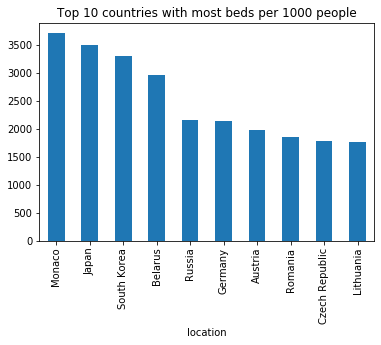

In [89]:
#Top 10 countries with best hospital facilities
covid_df.groupby(['location']).sum().sort_values('hospital_beds_per_thousand',ascending=False)['hospital_beds_per_thousand'].head(10).plot.bar()
plt.title('Top 10 countries with most beds per 1000 people')

Text(0.5, 1.0, 'Top 10 countries with most average deaths')

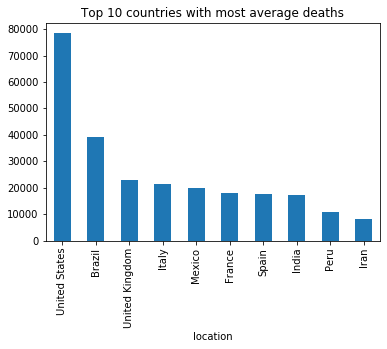

In [107]:
covid_df.groupby(['location']).mean().sort_values('total_deaths',ascending=False)['total_deaths'][1:11].plot.bar()
plt.title('Top 10 countries with most average deaths')

Text(0.5, 1.0, 'Top 10 countries with highest new_cases')

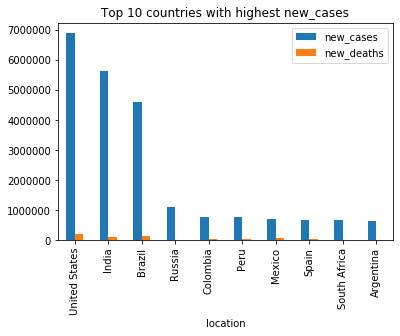

In [86]:
#total new_deaths according to location
covid_df.groupby(['location']).sum().sort_values(['new_cases','new_deaths'],ascending=False)[['new_cases','new_deaths']][1:11].plot.bar()
plt.title('Top 10 countries with highest new_cases')

Text(0.5, 1.0, 'Top 10 countries with highest average of diabetes prevalence')

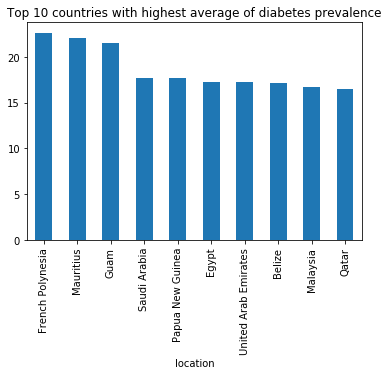

In [119]:
covid_df.groupby(['location']).mean().sort_values('diabetes_prevalence',ascending=False)['diabetes_prevalence'][1:11].plot.bar()
plt.title('Top 10 countries with highest average of diabetes prevalence')

Text(0.5, 1.0, 'Top 10 countries with highest smoking men and women')

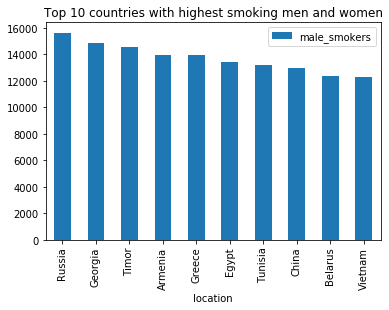

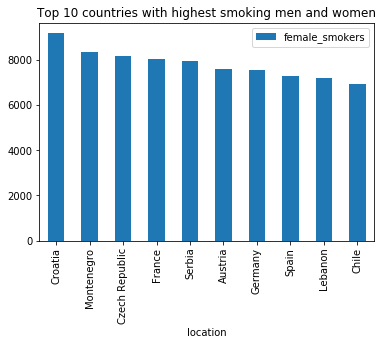

In [125]:
covid_df.groupby(['location']).sum().sort_values(['male_smokers'],ascending=False)[['male_smokers']][1:11].plot.bar()
plt.title('Top 10 countries with highest smoking men and women')
covid_df.groupby(['location']).sum().sort_values(['female_smokers'],ascending=False)[['female_smokers']][1:11].plot.bar()
plt.title('Top 10 countries with highest smoking men and women')

In [87]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} # dictionary for mapping months name to actual months in numbers provided in data frame for visualization

In [88]:
df = covid_df.groupby(['Year','Month','Day']).sum().sort_values(['Year','Month'],ascending=True) # sorting data frame before converting months to names

In [89]:
df.reset_index(inplace=True) #reset index of the dataframe
df['Month'] = df.Month.map(month_map) #mapping month names from the month_map dictionary

In [64]:
%%HTML
<div id="que" class="h2">4.Questions</div>
<ol>
  <li><a href="#1">What are the trends in new_cases world_wide ?</a></li>
  <li><a href="#2">What are the trends in new_deaths world_wide ?</a></li>
  <li><a href="#3">What are the trends of total_covid-19 cases ?</a></li>
  <li><a href="#4">Which countries are involved in COVID-19 ?</a></li>
  <li><a href="#5">What is the second wave of COVID-19 ? Which Countries are hit by second wave ?</a></li>
</ol>

In [62]:
  %%HTML
  <h1 id="1">1.What are the trends in new_cases world_wide ?</h1>

In [122]:
df.iplot(kind='bar',x=['Month','Day'],y='new_cases')# graph showing the visualization of the new_deaths across world by month,day

%%HTML
<p>From the plot above which describes about new cases world wide we can infer that new cases are on a rise ever since covid-19 has emerged so my guess is that it will not decline untill covid vaccine is there on the market</p>

In [65]:
  %%HTML
  <h1 id="2">2.What are the trends in new_deaths world_wide ?</h1>

In [123]:
df.iplot(kind='bar',x=['Month','Day'],y='new_deaths')

%%HTML
<p>From the above plot we can say that there was a decline in new deaths due to covid-19 between april month and june month and afterwards new deaths are rising between june and august , after august again there is a slight declain in new deaths but higher compared to the month of may</p>

In [66]:
  %%HTML
  <h1 id="3">3.What are the trends of total_covid-19 cases ?</h1>

In [121]:
df.iplot(kind='bar',x=['Year','Month','Day'],y='total_cases')

In [67]:
  %%HTML
  <h1 id="4">4.Which countries are affected and which are not affected in COVID-19 ?</h1>

In [109]:
url1='https://gist.githubusercontent.com/marijn/396531/raw/188caa065e3cd319fed7913ee3eecf5eec541918/countries.txt'
list_of_total_countries = pd.read_csv(url1,sep='|',names=['Country_Code','Country_Name'])

In [110]:
list_of_total_countries

,Country_Code,Country_Name
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra
...,...,...
236,WF,Wallis And Futuna
237,EH,Western Sahara
238,YE,Yemen
239,ZM,Zambia


In [111]:
#countries affected with COVID-19
Covid_19_countries = covid_df['location'].nunique()


In [112]:
#total countries in the world
Total_COuntries =list_of_total_countries['Country_Name'].nunique()

In [113]:
#number of countries not affected with covid19 are
Total_COuntries-Covid_19_countries

29

In [114]:
covid_countries = covid_df['location'].unique()

In [115]:
#countries not affected with corona virus
non_covid_countries=[]
for country in list_of_total_countries['Country_Name']:
    if country not in covid_countries:
        non_covid_countries.append(country)


In [116]:
np.array(non_covid_countries)

array(['American Samoa', 'Antarctica', 'Antigua And Barbuda',
       'Bosnia And Herzegovina', 'Bouvet Island',
       'British Indian Ocean Territory', 'Brunei Darussalam',
       'Christmas Island', 'Cocos (keeling) Islands',
       'Congo, The Democratic Republic Of The', 'Cook Islands',
       "Cote D'ivoire", 'East Timor', 'Falkland Islands (malvinas)',
       'Faroe Islands', 'French Guiana', 'French Southern Territories',
       'Guadeloupe', 'Guinea-bissau', 'Heard Island And Mcdonald Islands',
       'Holy See (vatican City State)', 'Iran, Islamic Republic Of',
       'Kazakstan', 'Kiribati', "Korea, Democratic People's Republic Of",
       'Korea, Republic Of', "Lao People's Democratic Republic",
       'Libyan Arab Jamahiriya', 'Macau',
       'Macedonia, The Former Yugoslav Republic Of', 'Marshall Islands',
       'Martinique', 'Mayotte', 'Micronesia, Federated States Of',
       'Moldova, Republic Of', 'Nauru', 'Netherlands Antilles', 'Niue',
       'Norfolk Island', 'Pala

In [68]:
  %%HTML
  <h1 id="5">5.What is the second wave of COVID-19 ? Which Countries are hit by second wave ?</h1>
  <p>The second wave of pandemic is not a distinctly defined stage. It is generally taken as a stage when the disease appears to be contained in its spread before infections start shooting up from a different group of the population or in different locality.</p>

In [263]:
covid_df[covid_df['location']=='United Kingdom'].sort_values(['Year','Month','Day']).iplot(kind='bar',x=['Year','Month','Day'],y='new_cases')


%%HTML
<p>Lets take a look at united kingdom new cases data , it started declining from the month of may to june and then the suddenly started to rise from last month that is agust and it is continuing to rise</p>

In [30]:
%%HTML
<div id="con" class="h2">5.Conclusions</div>
<p>We have seen how to load real world dataset, convert its column types according to our needs and then gone through some visualizations and finally answered the most relevant questions of today along with some graphs as proof. </p>

In [31]:
%%HTML
<div id="ref" class="h2">6.References</div>

In [137]:
%%HTML
<a href='https://github.com/owid/covid-19-data/tree/master/public/data'>COVID-19 Dataset</a>
</br>
<a href='https://www.kaggle.com/jpmiller/some-best-practices-for-analytics-reporting'>Best Practices for Analytics Reporting</a>
</br>
<a href='https://www.kaggle.com/thedatabeast/making-perfect-chai-and-other-tales/notebook'>Making perfect "Chai" and other tales :)</a>
</br>
<a href='https://www.kaggle.com/parulpandey/how-to-explore-the-ctds-show-data/notebook'>Parul Pandey's Guide Notebook</a>
</br>
<a href='https://www.google.com/search?q=covid+info&oq=covid+info&aqs=chrome..69i57j0l7.2056j0j7&sourceid=chrome&ie=UTF-8#wptab=s:H4sIAAAAAAAAAONgVuLVT9c3NMwySk6OL8zJecTozS3w8sc9YSmnSWtOXmO04eIKzsgvd80rySypFNLjYoOyVLgEpVB1ajBI8XOhCvHsYuL2SE3MKckILkksKV7EKpicX5Sfl1iWWVRarFAMEgMAoubRkIEAAAA'>COVID-19 Statistics</a>
</br>
<p>Data Science collaboration platform <a href='https://www.jovian.ml/?utm_source=webapp'>Jovian.ml</a></p>

In [126]:
import jovian

In [128]:
jovian.commit(project='covidproject',filename='Covid.ipynb')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "maheshvarma-dommaraju/covidproject" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Committed successfully! https://jovian.ml/maheshvarma-dommaraju/covidproject


'https://jovian.ml/maheshvarma-dommaraju/covidproject'